In [1]:
!pip install --upgrade pip

!pip install wordcloud

!pip install neattext

!pip install imblearn

!pip install mglearn

!pip install scikit-plot

!pip install keras-tqdm

  Using cached pip-21.0.1-py3-none-any.whl (1.5 MB)
  Attempting uninstall: pip
    Found existing installation: pip 20.3.3
    Uninstalling pip-20.3.3:
      Successfully uninstalled pip-20.3.3
     |████████████████████████████████| 366 kB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 112 kB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 167 kB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 22.2 MB 5.3 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
     |████████████████████████████████| 540 kB 6.2 MB/s eta 0:00:01
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=ab21dae1a7bef2e330c8626751c084cf2307bfb415f53dd84491ba586ed2d05b
  Stored in directory: /home/ec2-user/.cache/pip/wheels/d6/a5/f5/78d1aacafab120a99614ca8c044d485691a11bbc1e99c3c1a3
Successfully

In [2]:
import boto3
import re
import string
import math

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
get_ipython().magic('matplotlib inline')

from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, multilabel_confusion_matrix
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation 

import neattext as nt
import neattext.functions as nfx
from wordcloud import WordCloud, STOPWORDS, tokenization

import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer 
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

pd.set_option("display.max_rows", 50, "display.max_columns", 50, "display.max_colwidth", 100)

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D, GRU, SeparableConv2D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.metrics import Accuracy, Precision, Recall, AUC

Using TensorFlow backend.


In [4]:
df = pd.read_csv("no_stop_words-2.csv")

pd.set_option("display.max_rows", 50, "display.max_columns", 50, "display.max_colwidth", 400)

In [5]:
df.head()

,file_name,text,movie_title,genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Beasts_of_No_Nation.txt,cary joji fukunaga based novel uzodinma iweala dialogue screenplay faithful form novel originally lighter form nigerian pidgin english known krio krio dialects lingua franca west africa gambia cameroon spoken millions accented starting angle plastic exterior screen television children running circles football pitch angle boy balancing warm smile clever littler best friend ones talent agu passe...,Beasts of No Nation,"['Drama', 'War']",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Beauty_and_the_Beast.txt,stephen chbosky evan spiliotopoulos based animated film beauty beast screenplay linda woolverton august resplendent bespeaking great wealth power grounds stonework immaculate hidden heart france handsome young prince lived beautiful castle single clinging rose bush stormy spring night plucks rose heart desired prince selfish unkind groomed servants faces paints exotic animal mask princes feath...,Beauty and the Beast,"['Family', 'Fantasy', 'Musical']",0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Beavis_and_Butt-head_Do_America.txt,beavis butt america mike judge joe stillman location href location href mike judge joe stillman movie begins scenes screaming horror running streets big city ground shakes giant footsteps pieces building debris falling getting crushed power lines coming etc complete pandemonium japanese animated king kong godzilla movie footsteps getting closer ground shaking intense debris falling frame smash...,Beavis and Butt-head Do America,"['Animation', 'Comedy']",0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Beginners.txt,mike mills single daisy vase kitchen clicks light closet rack parents clothes begins box marked home box marked thrift oliver enters bathroom flushes bottle bottle pills liquids toilet struggles toothbrush hairbrush bottles tubes sink stares throws oliver hauls trash outside adding large pile bags older jack russell terrier follows oliver arthur sit office surrounded papers boxes books trash b...,Beginners,"['Comedy', 'Drama', 'Romance']",0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Being_Human.txt,bill forsyth january warner boulevard burbank california rights reserved stared sky listened cow mooing dreamily distant village tried understand meant sky fields humming telegraph pole felt point understanding started spin lucid languor intolerable vladimir nabokov script main characters inhabit different periods pre history present day story blend developing narrative lives suggestion travel...,Being Human,"['Comedy', 'Drama', 'Fantasy']",0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Define X and y variables

In [6]:
X = df['text']
y = df[['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller']]

### Assign Weights

In [7]:
cate = pd.DataFrame(y.sum()).reset_index().rename(columns = {'index':'genres1',0:'count'})
cate.head()

,genres1,count
0,Action,296
1,Adventure,179
2,Comedy,368
3,Crime,215
4,Drama,615


In [8]:
labels1 = cate.genres1.values

In [9]:
cate['class_weight'] = len(cate) / cate['count']
class_weight = {}
for index, label in enumerate(labels1):
    class_weight[index] = cate[cate['genres1'] == label]['class_weight'].values[0]
    
cate.head()

,genres1,count,class_weight
0,Action,296,0.037162
1,Adventure,179,0.061453
2,Comedy,368,0.029891
3,Crime,215,0.051163
4,Drama,615,0.017886


In [10]:
cate.sort_values('count')

,genres1,count,class_weight
7,Mystery,108,0.101852
5,Fantasy,110,0.100000
6,Horror,155,0.070968
9,Sci-Fi,170,0.064706
1,Adventure,179,0.061453
8,Romance,194,0.056701
3,Crime,215,0.051163
0,Action,296,0.037162
10,Thriller,309,0.035599
2,Comedy,368,0.029891


## Train-Test-Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
#Preview the shape of training and test set
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (855,)
y_train Shape: (855, 11)
X_test Shape: (286,)
y_test Shape: (286, 11)


In [13]:
y_train.columns.values

array(['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Fantasy',
       'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller'], dtype=object)

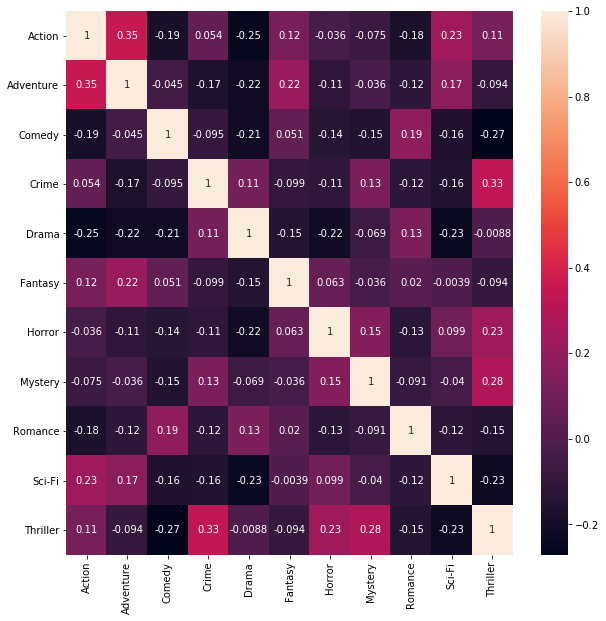

In [14]:

corr=y_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

plt.show()

## LDA

In [15]:
vect = CountVectorizer(max_features=20000, ngram_range=(1, 4), min_df = .10, stop_words='english')
X_train_vect = vect.fit_transform(X_train)
X_vect_test = vect.transform(X_test)

In [16]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(max_iter=25, random_state=0) 
# We build the model and transform the data in one step
# Computing transform takes some time,
# and we can save time by doing both at once 

document_topics = lda.fit_transform(X_train_vect)

In [17]:
lda.components_.shape

(10, 6808)

In [18]:
# For each topic (a row in the components_), sort the features (ascending) # Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# Get the feature names from the vectorizer
feature_names = np.array(vect.get_feature_names())

In [19]:
import mglearn
# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                                sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
fuck          sam           jack          mrs           john          
fucking       et            george        mary          feet          
shit          harry         walter        david         ray           
max           charlie       nick          night         grabs         
money         rose          ed            sir           road          
ta            en            camera        young         gun           
ya            son           drew          miss          steps         
mean          plan          shot          pause         truck         
aint          pour          jim           thank         reaches       
fuckin        main          uh            boy           glass         


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
ship

In [20]:
lda100 = LatentDirichletAllocation(n_components=100, max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X_train_vect)

In [21]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]

feature_names = np.array(vect.get_feature_names())

mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
gun           stage         president     zooms         fuck          horse         gun           
street        music         white         flapping      fucking       glass         light         
building      audience      war           flare         shit          horses        street        
security      song          office        flares        money         men           blood         
cars          play          country       flash         guy           river         wall          
doors         singing       general       flashes       guys          rifle         bed           
guard         crowd         world         flashing      fuckin        ground        police        
elevator      dance         black         flashlight    ass           trees         dark          
moving    

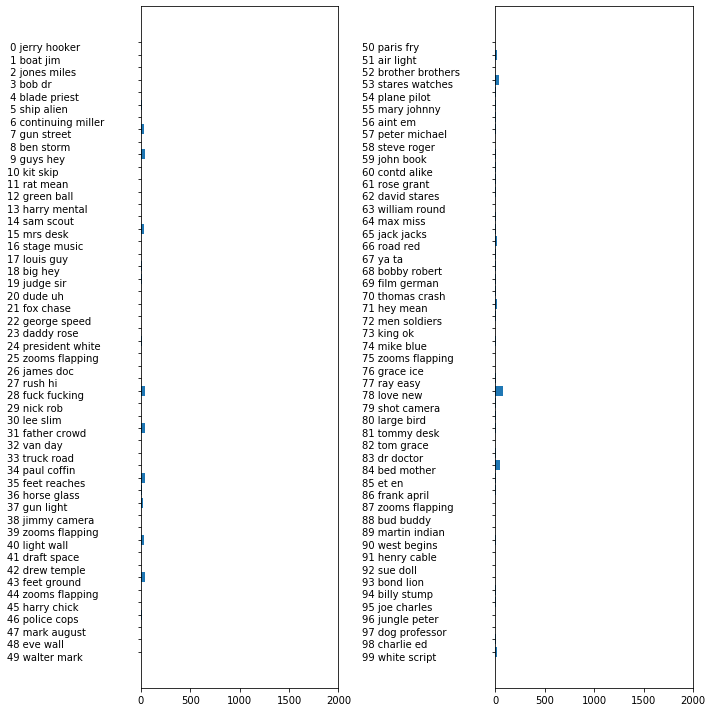

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))

topic_names = ["{:>2} ".format(i) + " ".join(words) for i, words in enumerate(feature_names[sorting[:, :2]])] # two column bar chart:
    
for col in [0, 1]: 
    start=col*50
    end=(col+1)*50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end]) 
    ax[col].set_yticks(np.arange(50)) 
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top") 
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)

plt.tight_layout()

## Embedding

In [23]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)

In [24]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [25]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [26]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('glove.6B.300d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

## t-SNE

In [27]:
from sklearn.manifold import TSNE

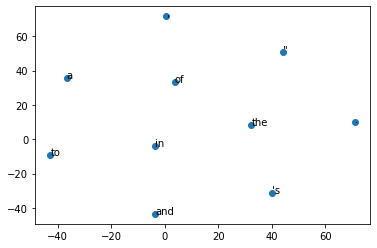

In [28]:
tsne = TSNE(n_components=2, random_state=0)
words =  list(embeddings_dictionary.keys())
vectors = [embeddings_dictionary[word] for word in words]
Yt = tsne.fit_transform(vectors[:10])
plt.scatter(Yt[:, 0], Yt[:, 1])

for label, x, y in zip(words, Yt[:, 0], Yt[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

## Model 1

In [29]:
model = Sequential()

model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False))

model.add(LSTM(128, return_sequences=True))
# model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(LSTM(128))
# model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))

# model.add(Flatten())
model.add(Dense(22, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(11, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[Precision(), Recall(), AUC(), 'acc'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 300)         35583900  
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 128)         219648    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 22)                2838      
_________________________________________________________________
dropout_3 (Dropout)          (None, 22)               

In [31]:
history = model.fit(X_train, y_train, class_weight=class_weight, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Train on 684 samples, validate on 171 samples
Epoch 1/5
684/684 [==============================] - 33s 49ms/step - loss: 0.0250 - precision_1: 0.2323 - recall_1: 0.3333 - auc_1: 0.5266 - acc: 0.6235 - val_loss: 0.0225 - val_precision_1: 0.2000 - val_recall_1: 0.0941 - val_auc_1: 0.5530 - val_acc: 0.7246
Epoch 2/5
684/684 [==============================] - 28s 42ms/step - loss: 0.0224 - precision_1: 0.2524 - recall_1: 0.1954 - auc_1: 0.5445 - acc: 0.7055 - val_loss: 0.0205 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_1: 0.5387 - val_acc: 0.7852
Epoch 3/5
684/684 [==============================] - 29s 42ms/step - loss: 0.0219 - precision_1: 0.2811 - recall_1: 0.1467 - auc_1: 0.5317 - acc: 0.7384 - val_loss: 0.0202 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_1: 0.5496 - val_acc: 0.7852
Epoch 4/5
684/684 [==============================] - 30s 44ms/step - loss: 0.0214 - precision_1: 0.2980 - recall_1: 0.1367 - auc_1: 0.5373 - acc: 0.7476 - val_lo

In [32]:
score = model.evaluate(X_test, y_test, verbose=1)
print(score)
print("Test Loss:", score[0])
print("Test Accuracy:", score[-1])

286/286 [==============================] - 4s 12ms/step
[0.5409686857170158, 0.0, 0.0, 0.5672482848167419, 0.7733629941940308]
Test Loss: 0.5409686857170158
Test Accuracy: 0.7733629941940308


In [33]:
y_pred = model.predict(X_test)

In [34]:
y_preds = model.predict(X_test[:5])

In [35]:
y_preds > 0.5

array([[False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False]])

In [36]:
print(y_test[:5])

      Action  Adventure  Comedy  Crime  Drama  Fantasy  Horror  Mystery  \
1071       1          0       0      0      1        0       0        0   
907        0          0       1      0      0        1       0        0   
290        1          0       0      1      1        0       0        0   
844        0          0       0      0      1        0       0        0   
333        1          0       0      1      1        0       0        0   

      Romance  Sci-Fi  Thriller  
1071        0       0         0  
907         0       0         0  
290         0       0         1  
844         0       0         0  
333         0       0         1  


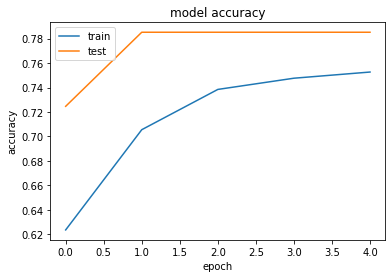

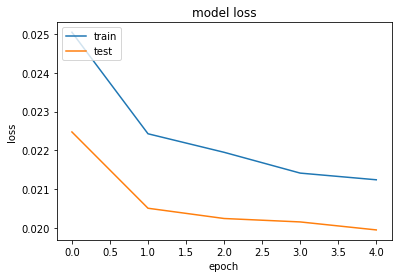

In [37]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [39]:
# import scikitplot as skplt
# predicted_probas = model.predict_proba(X_test)

# skplt.metrics.plot_roc(y_test, predicted_probas)
# plt.show()

## Model 2

In [40]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

In [41]:
model = Sequential()

model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False))
model.add(LSTM(25, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 300)         35583900  
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 25)          32600     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 25)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                1300      
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 11)               

In [42]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=[Precision(), Recall(), AUC(), 'acc'])

In [43]:
model.fit(X_train, y_train, class_weight=class_weight, epochs=10, batch_size=128, validation_split=0.2)

Train on 684 samples, validate on 171 samples
Epoch 1/10
684/684 [==============================] - 10s 15ms/step - loss: 0.0283 - precision_2: 0.2208 - recall_2: 0.5787 - auc_2: 0.5221 - acc: 0.4755 - val_loss: 0.0253 - val_precision_2: 0.2744 - val_recall_2: 0.5644 - val_auc_2: 0.5873 - val_acc: 0.5859
Epoch 2/10
684/684 [==============================] - 7s 10ms/step - loss: 0.0264 - precision_2: 0.2329 - recall_2: 0.5006 - auc_2: 0.5362 - acc: 0.5427 - val_loss: 0.0241 - val_precision_2: 0.2876 - val_recall_2: 0.4876 - val_auc_2: 0.6037 - val_acc: 0.6305
Epoch 3/10
684/684 [==============================] - 7s 10ms/step - loss: 0.0252 - precision_2: 0.2472 - recall_2: 0.4295 - auc_2: 0.5457 - acc: 0.6001 - val_loss: 0.0232 - val_precision_2: 0.3000 - val_recall_2: 0.2450 - val_auc_2: 0.6176 - val_acc: 0.7150
Epoch 4/10
684/684 [==============================] - 7s 10ms/step - loss: 0.0242 - precision_2: 0.2539 - recall_2: 0.3571 - auc_2: 0.5579 - acc: 0.6397 - val_loss: 0.0225 - va

In [44]:
score = model.evaluate(X_test, y_test, verbose=1)
print(score)
print("Test Loss:", score[0])
print("Test Accuracy:", score[-1])

286/286 [==============================] - 1s 4ms/step
[0.5168712214156465, 0.0, 0.0, 0.6759920120239258, 0.7733629941940308]
Test Loss: 0.5168712214156465
Test Accuracy: 0.7733629941940308


In [45]:
y_pred = model.predict(X_test)

In [46]:
y_preds = model.predict(X_test[:5])

In [47]:
y_preds > 0.5

array([[False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False]])

In [48]:
print(y_test[:5])

      Action  Adventure  Comedy  Crime  Drama  Fantasy  Horror  Mystery  \
1071       1          0       0      0      1        0       0        0   
907        0          0       1      0      0        1       0        0   
290        1          0       0      1      1        0       0        0   
844        0          0       0      0      1        0       0        0   
333        1          0       0      1      1        0       0        0   

      Romance  Sci-Fi  Thriller  
1071        0       0         0  
907         0       0         0  
290         0       0         1  
844         0       0         0  
333         0       0         1  


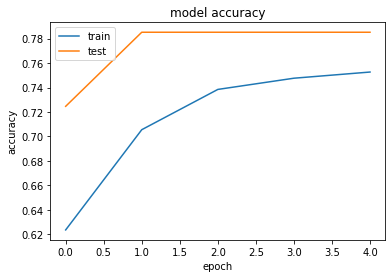

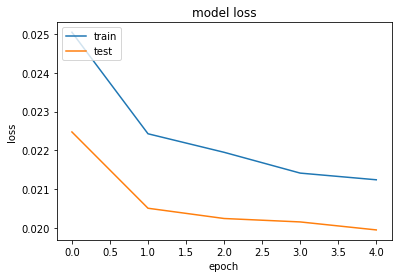

In [49]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Model 3

In [50]:
from keras_tqdm import TQDMNotebookCallback

from keras.models import Sequential
from keras.layers import Dense, Activation, MaxPooling1D, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D, GRU, SeparableConv2D
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.losses import binary_crossentropy
from keras.optimizers import Adam
from keras_tqdm import TQDMCallback 

# tqdm_callback = tfa.callbacks.TQDMProgressBar()

filter_length = 64
num_classes = 11
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=maxlen))
model.add(GRU(128, return_sequences=True))
model.add(Dropout(0.1))
# model.add(SeparableConv2D(filter_length, 5, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPool1D())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Precision(), Recall(), AUC(), 'acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 128)          15182464  
_________________________________________________________________
gru_1 (GRU)                  (None, 200, 128)          98688     
_________________________________________________________________
dropout_6 (Dropout)          (None, 200, 128)          0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                6450      
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 11)               

In [51]:
callbacks1 = [
    ReduceLROnPlateau(), 
    TQDMNotebookCallback(leave_inner = True, leave_outer = True),
    EarlyStopping(monitor='val_loss', patience=10), 
    ModelCheckpoint(filepath='model-conv1d1.h5', monitor='val_loss', save_best_only=True)
]

history = model.fit(X_train, y_train,
                    class_weight=class_weight,
                    epochs=40,
                    batch_size=10,
                    validation_split=0.1,
                    callbacks=callbacks1,
                   verbose=0)

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [52]:
score = model.evaluate(X_test, y_test, verbose=1)
print(score)
print("Test Loss:", score[0])
print("Test Accuracy:", score[-1])

286/286 [==============================] - 2s 8ms/step
[0.4189602770171799, 0.6708595156669617, 0.44880786538124084, 0.839986264705658, 0.8251748085021973]
Test Loss: 0.4189602770171799
Test Accuracy: 0.8251748085021973


In [53]:
y_pred = model.predict(X_test)

In [54]:
y_preds = model.predict(X_test[:5])

In [55]:
(y_preds > 0.5)

array([[False, False, False, False,  True, False, False, False, False,
        False, False],
       [False, False,  True, False, False, False, False, False, False,
        False, False],
       [False, False, False,  True,  True, False, False, False, False,
        False,  True],
       [False, False, False, False,  True, False, False, False, False,
        False, False],
       [False, False, False, False,  True, False, False, False, False,
        False, False]])

In [56]:
print(y_test[:5])

      Action  Adventure  Comedy  Crime  Drama  Fantasy  Horror  Mystery  \
1071       1          0       0      0      1        0       0        0   
907        0          0       1      0      0        1       0        0   
290        1          0       0      1      1        0       0        0   
844        0          0       0      0      1        0       0        0   
333        1          0       0      1      1        0       0        0   

      Romance  Sci-Fi  Thriller  
1071        0       0         0  
907         0       0         0  
290         0       0         1  
844         0       0         0  
333         0       0         1  


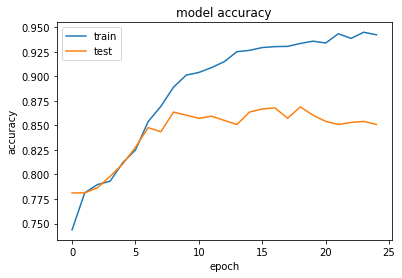

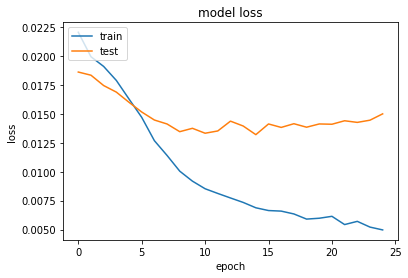

In [57]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [58]:
def plot_roc(model,y_bin,X):
    fpr = {}
    tpr = {}
    for i, cl in enumerate(model.classes_):
        fpr[cl], tpr[cl], _ = metrics.roc_curve(y_bin[:,i],model.predict_proba(X)[:,i])
    auc_scores = [round(metrics.roc_auc_score(y_bin[:,i],model.predict_proba(X)[:,i]),2) for i in range(len(model.classes_))]
    for i, key in enumerate(fpr.keys()):
        plt.plot(fpr[key],tpr[key],lw=2,label='class {}, ROC_AUC {}'.format(key,auc_scores[i]))
    plt.plot([0,1],[0,1],ls='--',lw=2)
    plt.ylim([0,1.05])
    plt.legend(loc='lower right')
    plt.title('ROC Curve',fontsize=20)
    plt.xlabel('FPR',fontsize=18)
    plt.ylabel('TPR',fontsize=18)
    
    plt.show()

## Model 4

In [ ]:
model = Sequential()


model.add(Embedding(vocab_size, 32, input_length=maxlen, trainable = False))

model.add(SeparableConv2D(128,3,activation='relu'))
model.add(MaxPooling1D(3))

model.add(SeparableConv2D(128,3,activation='relu'))
model.add(MaxPooling1D(3))

model.add(SeparableConv2D(128,3,activation='relu'))
model.add(GlobalMaxPooling1D())

model.add(Dense(22,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=[Precision(), Recall(), AUC(), 'acc'])


model.summary()

In [ ]:
callbacks1 = [
    ReduceLROnPlateau(), 
    TQDMNotebookCallback(leave_inner = True, leave_outer = True),
    EarlyStopping(monitor='val_loss', patience=10), 
    ModelCheckpoint(filepath='model-conv1d1.h5', monitor='val_loss', save_best_only=True)
]

history = model.fit(X_train, y_train,
                    class_weight=class_weight,
                    epochs=40,
                    batch_size=10,
                    validation_split=0.1,
                    callbacks=callbacks1,
                   verbose=0)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print(score)
print("Test Loss:", score[0])
print("Test Accuracy:", score[-1])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])

# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train','test'], loc='upper left')
# plt.show()

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])

# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train','test'], loc='upper left')
# plt.show()

## Model 5

In [ ]:
model = Sequential()
model.add(Embedding(30000, 128))
model.add(LSTM(units = 128, dropout = 0.2, recurrent_dropout = 0.2,return_sequences=True))
model.add(LSTM(units = 128, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(units = 22, activation = 'sigmoid'))
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=[Precision(), Recall(), AUC(), 'acc'])




In [ ]:
callbacks1 = [
    ReduceLROnPlateau(), 
    TQDMNotebookCallback(leave_inner = True, leave_outer = True),
    EarlyStopping(monitor='val_loss', patience=10), 
    ModelCheckpoint(filepath='model-conv1d1.h5', monitor='val_loss', save_best_only=True)
]

history = model.fit(X_train, y_train,
                    class_weight=class_weight,
                    epochs=40,
                    batch_size=10,
                    validation_split=0.1,
                    callbacks=callbacks1,
                   verbose=0)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print(score)
print("Test Loss:", score[0])
print("Test Accuracy:", score[-1])

In [ ]:
y_pred = model.predict(X_test)